In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
!git clone https://github.com/tinongdan/iris.git

fatal: destination path 'iris' already exists and is not an empty directory.


##**Đọc dữ liệu**

In [31]:
data_df = pd.read_csv('iris/Iris.csv')
data_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **Kiểm tra kiểu dữ liệu**

In [32]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
data_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## **Ý nghĩa các cột dữ liệu**


| **STT** | **Tên Cột**                  | **Ý Nghĩa**                                                                                                                                               |
|:-------:|-------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
|    1    | Id                                  |Id                                                                                                           |
|    2    | SepalLengthCm                      | Length of the sepal (in cm)                                     |
|    3    | SepalWidthCm                            | Width of the sepal (in cm)                                                                                                                    |
|    4    | PetalLengthCm                   | Length of the petal (in cm)                                                                                                              |
|    5    | PetalWidthCm                    | Width of the petal (in cm)                                                                                                                                       |
|    6    | Species                       | Species name                                                                                                             |


## **Kiểm tra số lượng dữ liệu**

In [34]:
data_df.shape

(150, 6)

Dữ liệu có 6 cột và 150 dòng

## **Kiểm tra sự trùng lặp**

In [35]:
index = data_df.index
deDupSeries = index.duplicated(keep='first')
num_duplicated_rows = deDupSeries.sum()
index
if num_duplicated_rows == 0:
    print("Dữ liệu không có sự trùng lặp.")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng trùng lặp.")

Dữ liệu không có sự trùng lặp.


## **Kiểm tra Missing Rate**

In [36]:
raw_data_missing = data_df.isna().sum()
raw_data_missing_rate = (raw_data_missing / len(data_df))*100
columns_with_missing_data = raw_data_missing_rate[raw_data_missing_rate > 0]
print(columns_with_missing_data)

Series([], dtype: float64)


dữ liệu không có dấu hiệu missing

## **Chia loại dữ liệu Num hoặc Cate**

In [37]:
num_list = list(data_df.dtypes[data_df.dtypes != 'object'].index)
num_list

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [38]:
cate_list = list(data_df.dtypes[data_df.dtypes == 'object'].index)
cate_list


['Species']

## **EDA**

### Phân phối giá trị các biến Num

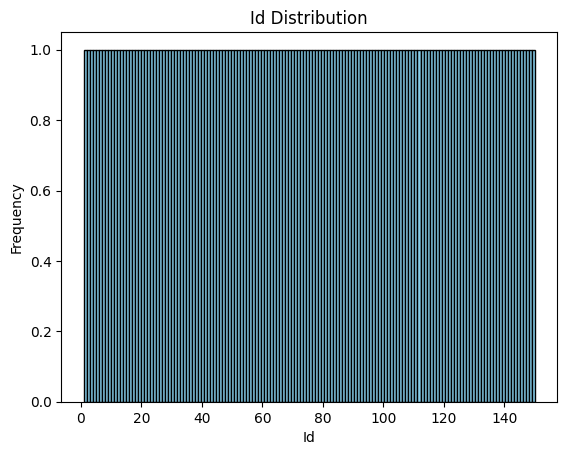

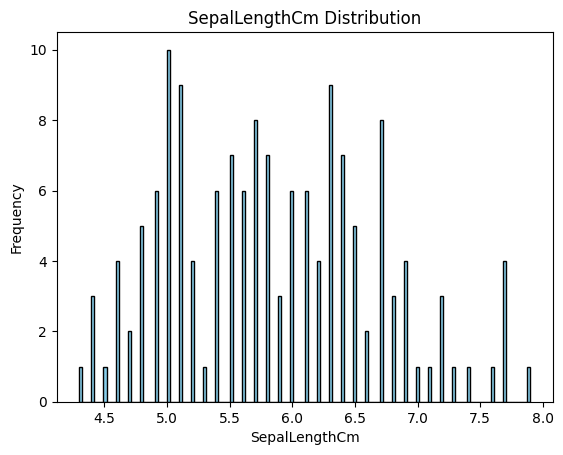

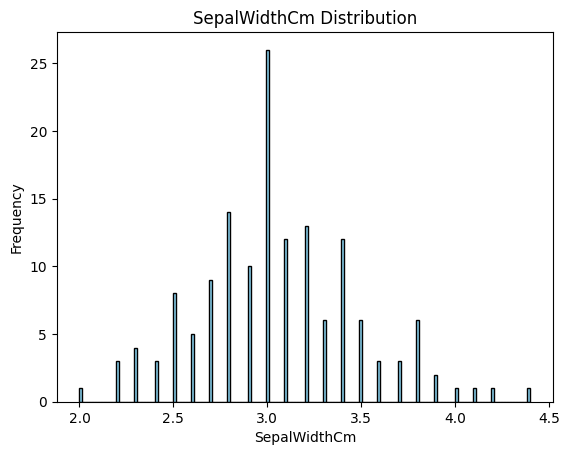

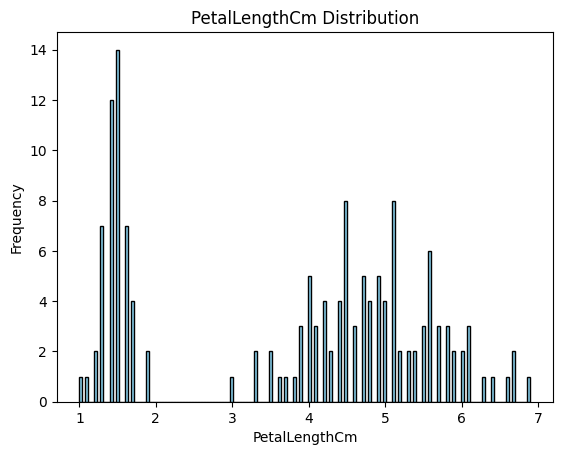

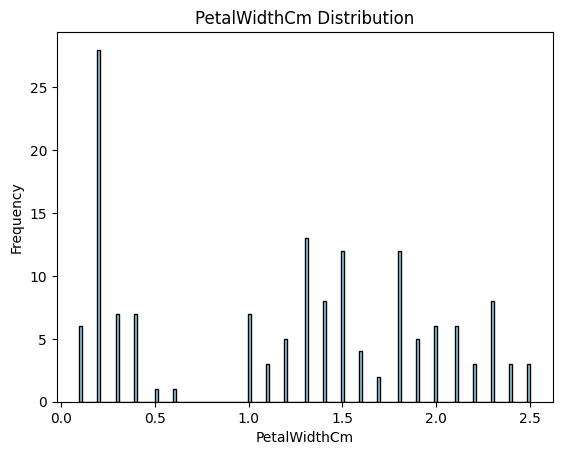

In [39]:
for i in range(len(num_list)):
  plt.hist(data_df[num_list[i]], bins=150, color='skyblue', edgecolor='black')
  plt.title(num_list[i] +' Distribution')
  plt.xlabel(num_list[i])
  plt.ylabel('Frequency')
  plt.show()

Ngoại trừ biến ID là khóa nên có giá trị phân biệt. Còn các biến còn lại nhìn chung khá mất cân bằng.

### Phân tích tỉ lệ biến Cate

In [40]:
cate_analyze = 0
country_frequency = data_df[cate_list[cate_analyze]].value_counts()

country_ratio = country_frequency / len(data_df) * 100

print(country_ratio)

Species
Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: count, dtype: float64


Phân phối các biến Cate rất đều

### Phân tích tương quan các biến Num

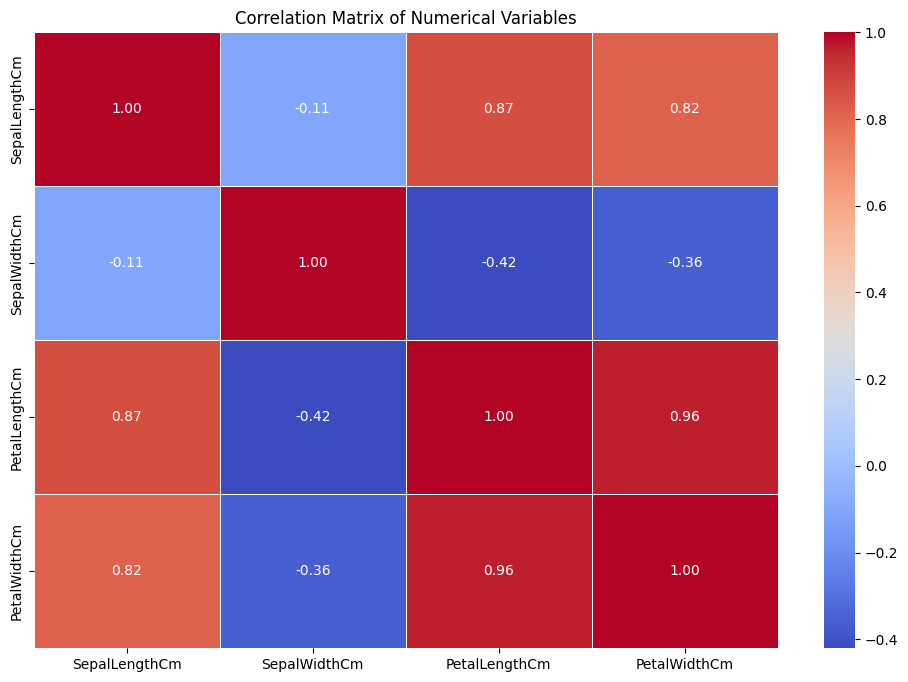

In [41]:
correlation_matrix = data_df[num_list[1::]].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

* Petal width và petal length có tương quan cao.
* Petal length và sepal width có tương quan tốt.
* Petal Width và Sepal length có tương quan tốt.


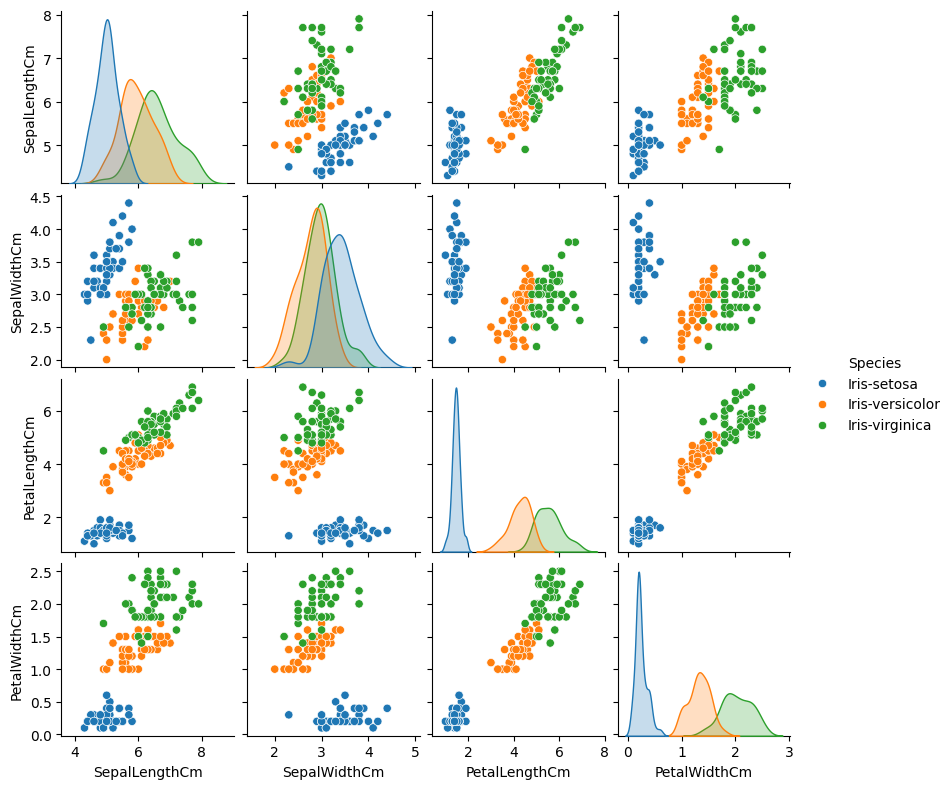

In [42]:
# Biểu đồ phân phối của các biến số định lượng
sns.pairplot(data_df.drop(['Id'], axis = 1), hue='Species', height=2)

* Chúng ta có thể thấy nhiều loại mối quan hệ từ biểu đồ này, chẳng hạn như loài Setosa có chiều rộng và chiều dài cánh hoa nhỏ nhất. Nó cũng có chiều dài lá đài nhỏ nhất nhưng chiều rộng lá đài lớn hơn. Thông tin như vậy có thể được thu thập về bất kỳ loài nào khác.
* Nhìn sơ chỉ với 2 tham số ta có thể thấy các giá trị có khả năng phân cụm.
 * Trong hầu hết các biểu đồ thì Iris-setosa có khả năng phân cụm rất cao(gần như là phân biệt hoàn toàn với 2 lớp còn lại).
 * Đối với 2 lớp Iris-versicolor và Iris-virginica thì cũng có khả năng phân cụm tương đối tốt (có một số điểm ngoại lệ, tuy nhiên tổng quan thì khả năng phân cụm này khá tốt)

### Phân tích tương quan các biến Num và biến Cate

<ipython-input-47-55d7cffe747c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=y, data=data_df,palette='YlGnBu')
<ipython-input-47-55d7cffe747c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=y, data=data_df,palette='YlGnBu')
<ipython-input-47-55d7cffe747c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=y, data=data_df,palette='YlGnBu')
<ipython-input-47-55d7cffe747c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

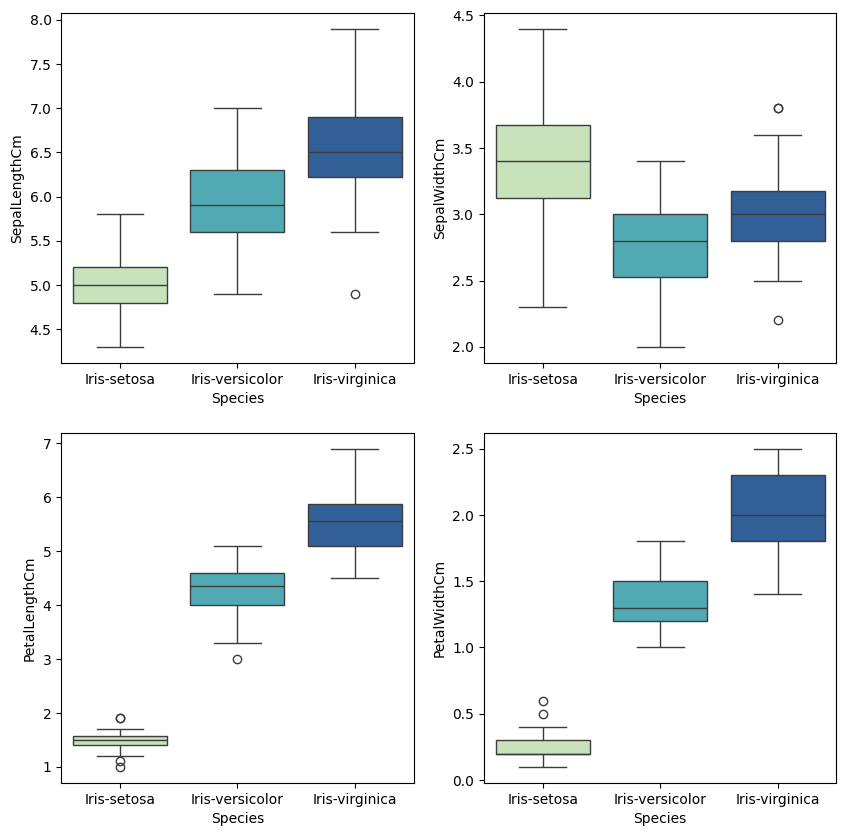

In [47]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=data_df,palette='YlGnBu')

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()

* Loài Setosa có đặc điểm nhỏ nhất và ít phân bố hơn với một số ngoại lệ.
* Loài Versicolor có đặc điểm trung bình.
* Loài Virginica có những đặc tính cao nhất

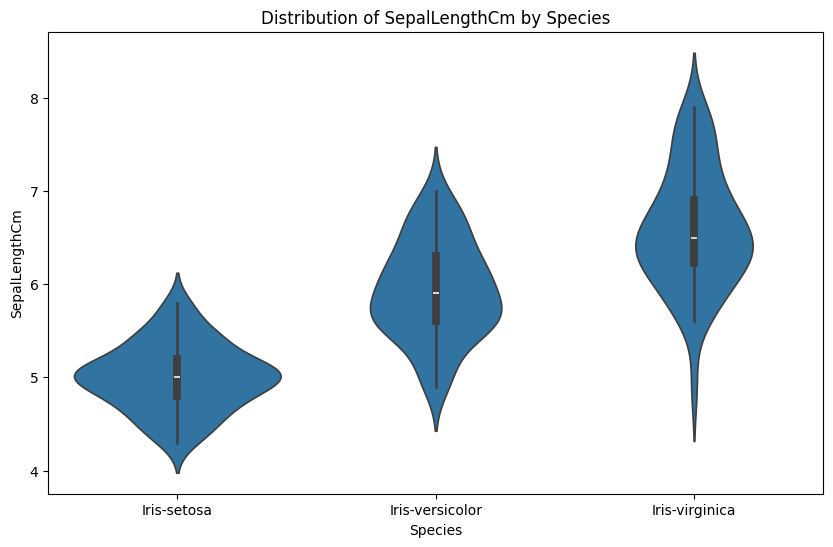

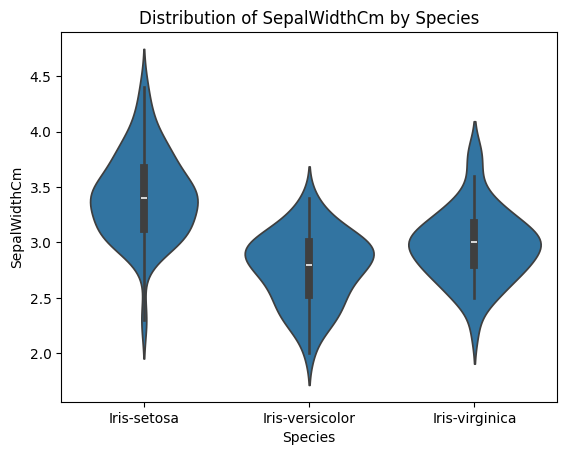

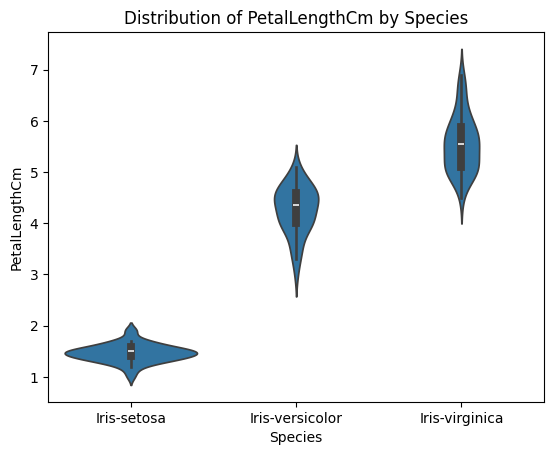

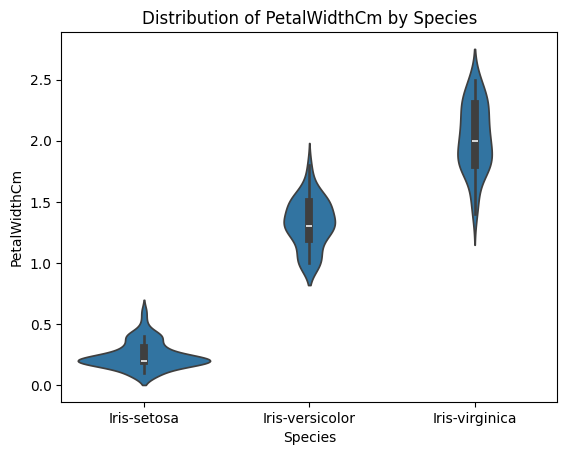

In [44]:
# Biểu đồ phân phối của biến phân loại theo biến số định lượng
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(10, 6))
for col in num_cols:
    sns.violinplot(x='Species', y=col, data=data_df)
    plt.title(f'Distribution of {col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)
    plt.show()





*   Iris-setosa có khả năng phân loại khá rõ với 2 thuộc tính PetalLengthCm và PentalWidthCm.</br>
*   Đối với 2 biến SepalLengthCm và SepalWidthCm thì khả năng phân loại ít rõ ràng hơn.

